In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_data = loadmat("train_32x32.mat")
test_data = loadmat("test_32x32.mat")

In [17]:
X_train = train_data['X']  
y_train = train_data['y'].flatten()  

X_test = test_data['X']  
y_test = test_data['y'].flatten()  


In [18]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [19]:
X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)

In [20]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [21]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [22]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=64)

In [23]:
model = models.Sequential()

In [24]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax'))

c:\Users\aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.fit(train_generator, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


c:\Users\aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 141s 117ms/step - accuracy: 0.2654 - loss: 2.0620 - val_accuracy: 0.7739 - val_loss: 0.8351
Epoch 2/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 148s 129ms/step - accuracy: 0.6232 - loss: 1.1739 - val_accuracy: 0.8468 - val_loss: 0.5649
Epoch 3/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 161s 140ms/step - accuracy: 0.7076 - loss: 0.9282 - val_accuracy: 0.8682 - val_loss: 0.4813
Epoch 4/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 135s 117ms/step - accuracy: 0.7508 - loss: 0.8086 - val_accuracy: 0.8841 - val_loss: 0.4147
Epoch 5/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 140s 122ms/step - accuracy: 0.7784 - loss: 0.7300 - val_accuracy: 0.8888 - val_loss: 0.4045
Epoch 6/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 177s 154ms/step - accuracy: 0.7955 - loss: 0.6796 - val_accuracy: 0.8965 - val_loss: 0.3683
Epoch 7/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 148s 129ms/step - accuracy: 0.8049 - loss: 0.6441 - val_accuracy: 0.8987 - val_loss: 0.3538
Epoch 8/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 140s 122ms/step - accuracy: 0.8

In [27]:
# Save the trained model
model.save('trained_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Assuming the model has already been trained and is loaded

def predict_digit(img_path, model):
    """
    This function takes an image path, processes the image, and predicts the digit using the trained model.
    
    Args:
    img_path (str): Path to the input image.
    model (Keras model): The trained CNN model.
    
    Returns:
    int: Predicted digit (0-9).
    """
    
    # Load the image
    img = image.load_img(img_path, target_size=(32, 32))  # Resize to 32x32
    plt.imshow(img)
    plt.show()
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Normalize the image
    img_array = img_array.astype('float32') / 255.0
    
    # Expand dimensions to match the input shape of the model [1, 32, 32, 3]
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class (digit) using the model
    prediction = model.predict(img_array)
    
    # Get the index (digit) with the highest probability
    predicted_digit = np.argmax(prediction)
    
    print(f"The predicted digit is: {predicted_digit}")
    return predicted_digit

# Example usage:
# Assuming you have trained the model and saved it as 'trained_model.h5'
# model = models.load_model('trained_model.h5')
# predict_digit('path_to_image.png', model)
model = models.load_model('trained_model.h5')

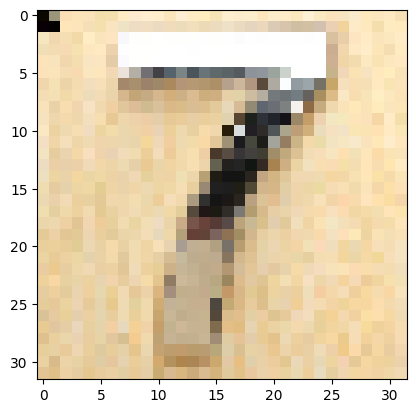

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
The predicted digit is: 7


7

In [29]:
predict_digit("7.jpg",model)